In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import os

In [3]:
df = pd.read_csv('cleaning_data.csv')
df.head()

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi
0,1325,1,1.9,1,2.0,1,50,0.1,146,1,10,499,695,2328.0,2,0,1,1,0
1,1046,0,2.8,0,0.0,0,58,0.2,100,8,0,259,1040,3863.0,9,0,0,0,1
2,843,1,1.3,0,1.0,1,16,0.9,119,7,4,593,732,1734.0,14,1,1,0,2
3,894,1,0.5,0,1.0,0,50,0.5,199,3,14,1285,1462,3615.0,6,0,1,0,1
4,936,1,1.0,1,1.0,1,18,0.2,153,3,18,1330,1686,2391.0,3,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   BataryaGucu          2000 non-null   int64  
 1   Bluetooth            2000 non-null   int64  
 2   MikroislemciHizi     2000 non-null   float64
 3   CiftHat              2000 non-null   int64  
 4   OnKameraMP           2000 non-null   float64
 5   4G                   2000 non-null   int64  
 6   DahiliBellek         2000 non-null   int64  
 7   Kalinlik             2000 non-null   float64
 8   Agirlik              2000 non-null   int64  
 9   CekirdekSayisi       2000 non-null   int64  
 10  ArkaKameraMP         2000 non-null   int64  
 11  CozunurlukYükseklik  2000 non-null   int64  
 12  CozunurlukGenislik   2000 non-null   int64  
 13  RAM                  2000 non-null   float64
 14  BataryaOmru          2000 non-null   int64  
 15  3G                   2000 non-null   i

In [5]:
df.corr()

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi
BataryaGucu,1.000000,-0.011252,0.011482,0.041847,0.032192,-0.015665,-0.004004,0.034085,0.001844,-0.029727,0.031441,0.014901,-0.008402,0.001017,0.052510,-0.011522,0.010516,0.008343,-0.123526
Bluetooth,-0.011252,1.000000,-0.021419,0.035198,-0.002186,0.013443,-0.041177,-0.004049,0.008605,-0.036161,0.009952,0.006872,0.041533,-0.025398,-0.013934,-0.030236,0.010061,-0.021863,0.006261
MikroislemciHizi,0.011482,-0.021419,1.000000,0.001315,-0.000246,0.043073,0.006545,-0.014364,0.012350,-0.005724,-0.005245,-0.014523,-0.009476,0.003289,-0.011432,0.046433,-0.019756,0.024471,0.004029
CiftHat,0.041847,0.035198,0.001315,1.000000,0.028692,0.003187,0.015679,0.022142,0.008979,0.024658,0.017143,0.020875,-0.014291,-0.041740,0.039404,-0.014008,-0.017117,0.022740,0.003131
OnKameraMP,0.032192,-0.002186,-0.000246,0.028692,1.000000,0.017030,-0.028572,-0.001774,0.024632,-0.013685,0.644543,-0.010676,-0.005633,0.013733,-0.007037,-0.002083,0.014375,-0.021473,-0.030718
4G,-0.015665,0.013443,0.043073,0.003187,0.017030,1.000000,-0.008690,0.001823,0.016537,0.029706,0.005598,0.019236,-0.007448,-0.006855,0.046628,0.584246,0.016758,-0.017620,-0.010295
DahiliBellek,-0.004004,-0.041177,0.006545,0.015679,-0.028572,-0.008690,1.000000,0.006886,-0.034214,-0.028310,-0.033273,0.010441,-0.008335,0.033154,-0.002790,0.009366,0.026999,-0.006993,-0.006767
Kalinlik,0.034085,-0.004049,-0.014364,0.022142,-0.001774,0.001823,0.006886,1.000000,0.021756,-0.003504,0.026282,0.025263,0.023566,-0.009837,0.017003,0.012065,0.002638,0.028353,0.007832
Agirlik,0.001844,0.008605,0.012350,0.008979,0.024632,0.016537,-0.034214,0.021756,1.000000,-0.018989,0.018844,0.000939,0.000090,-0.004101,0.006209,-0.001551,0.014368,0.000409,-0.015783
CekirdekSayisi,-0.029727,-0.036161,-0.005724,0.024658,-0.013685,0.029706,-0.028310,-0.003504,-0.018989,1.000000,-0.001193,-0.006872,0.024480,0.004930,0.013148,0.014733,-0.023774,0.009964,-0.021996


# Logistic Regression

## Model

In [4]:
x = df.drop(["FiyatAraligi"], axis=1)
y = df["FiyatAraligi"]

In [7]:
x

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi
0,1325,1,1.9,1,2.0,1,50,0.1,146,1,10,499,695,2328.0,2,0,1,1
1,1046,0,2.8,0,0.0,0,58,0.2,100,8,0,259,1040,3863.0,9,0,0,0
2,843,1,1.3,0,1.0,1,16,0.9,119,7,4,593,732,1734.0,14,1,1,0
3,894,1,0.5,0,1.0,0,50,0.5,199,3,14,1285,1462,3615.0,6,0,1,0
4,936,1,1.0,1,1.0,1,18,0.2,153,3,18,1330,1686,2391.0,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,689,1,2.9,0,3.0,0,7,0.8,147,2,6,487,722,1241.0,16,0,1,1
1996,1654,1,1.8,1,1.0,1,11,0.3,146,7,2,1184,1719,1070.0,14,0,0,0
1997,742,1,2.2,0,4.0,1,56,0.2,190,7,14,577,1359,3557.0,12,1,0,0
1998,704,1,2.2,0,4.0,1,53,0.2,186,6,6,251,1013,3653.0,15,0,0,0


In [8]:
y # we have 4 options at our dependent variable but logistic regression uses binary variables. Though we are going to apply that

0       0
1       1
2       2
3       1
4       0
       ..
1995    3
1996    2
1997    1
1998    0
1999    0
Name: FiyatAraligi, Length: 2000, dtype: int64

In [9]:
type(y)

pandas.core.series.Series

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.20, 
                                                    random_state=42)

In [39]:
loj = LogisticRegression(solver="liblinear")
loj_model = loj.fit(x_train, y_train)
loj_model

LogisticRegression(solver='liblinear')

In [40]:
print(loj_model.intercept_)
print(loj_model.coef_)

[-4.67698256e-01 -1.06383753e+01 -2.38788595e-03  8.39182976e+00]
[[-2.14649867e-04 -2.22428059e-02 -1.20152973e-01  6.68291579e-02
   2.09175358e-02  2.28252799e-01 -9.00934000e-03 -2.36655132e-01
  -1.24644139e-03  1.45234553e-02 -2.74953163e-02 -4.69641212e-05
  -3.42613796e-04  4.76842428e-04 -2.03194470e-02 -2.76141055e-01
   1.22628186e-01 -1.29971050e-02]
 [ 1.90124032e-03 -2.16865897e-01 -1.56704418e-01 -1.78779122e-01
  -4.93215676e-03 -6.70117319e-01 -1.92015626e-03 -7.39160984e-01
  -2.31428396e-02 -1.24006670e-01 -1.44501257e-02  1.49288926e-03
   8.95163215e-04  3.90767256e-03 -3.31756891e-02  4.28372993e-01
  -3.95328802e-01 -3.49392428e-02]
 [-1.42795020e-04 -3.96514764e-03 -1.66069095e-02 -9.60335627e-04
   7.41186525e-03 -3.95180275e-03  1.93454215e-03  7.58727299e-03
   1.17242704e-04 -4.23122294e-02  6.27290199e-03  1.02077503e-04
   3.18357945e-06 -5.57377000e-04  1.43959624e-02 -6.25027269e-04
  -7.97423721e-03  3.16247897e-03]
 [-2.99718158e-03  3.25548856e-01  4.

## Prediction & Model Tuning

In [41]:
y_pred = loj_model.predict(x_test)
confusion_matrix(y_test, y_pred)

array([[ 53,  22,  22,   0],
       [  0,  94,   0,   0],
       [ 25,   0,  63,  12],
       [  0,   0,   2, 107]], dtype=int64)

In [42]:
accuracy_score(y_test, y_pred)

0.7925

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.55      0.61        97
           1       0.81      1.00      0.90        94
           2       0.72      0.63      0.67       100
           3       0.90      0.98      0.94       109

    accuracy                           0.79       400
   macro avg       0.78      0.79      0.78       400
weighted avg       0.78      0.79      0.78       400



In [17]:
loj_parameters = {'penalty' : ['l1', 'l2', 'elasticnet'],
                  'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
                  'multi_class' : ['auto', 'ovr', 'multinominal']}
loj_cv = GridSearchCV(loj, loj_parameters, cv=10)
loj_cv.fit(x_train, y_train) # optimized model

GridSearchCV(cv=10, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'multi_class': ['auto', 'ovr', 'multinominal'],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']})

In [18]:
loj_cv.best_params_

{'multi_class': 'auto', 'penalty': 'l2', 'solver': 'newton-cg'}

In [44]:
loj = LogisticRegression(multi_class = 'auto', 
                         penalty = 'l2',
                         solver = 'newton-cg')
loj_tuned = loj.fit(x_train, y_train) # optimized model

In [45]:
y_pred = loj_tuned.predict(x_test)
accuracy_score(y_test, y_pred) # Our result is better than up to result but this model can was overfit. We will look after time

0.975

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95        97
           1       0.97      0.99      0.98        94
           2       0.98      0.96      0.97       100
           3       0.99      1.00      1.00       109

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



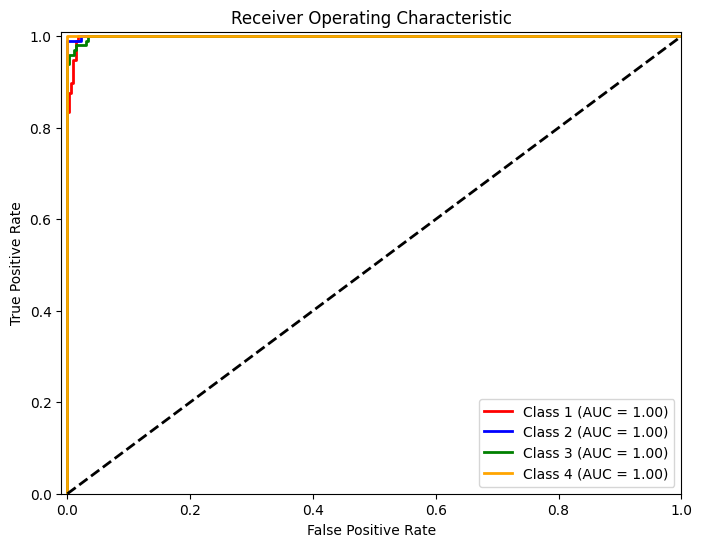

In [22]:
# FPR, TPR and threshold value calculate for every class
fpr = {}
tpr = {}
thresh = {}
for i in range(4):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, loj_tuned.predict_proba(x_test)[:,i], pos_label=i)

# ROC curves draw
plt.figure(figsize=(8,6))
colors = ['red', 'blue', 'green', 'orange']
for i in range(4):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label='Class {0} (AUC = {1:0.2f})'
             ''.format(i+1, np.trapz(tpr[i],fpr[i])))
    
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Naive Bayes

## Model & Prediction

In [47]:
nb = GaussianNB()
nb_model = nb.fit(x_train, y_train)
nb_model

GaussianNB()

In [48]:
nb_model.predict(x_test)[0:10]

array([0, 3, 1, 2, 0, 0, 1, 2, 1, 2], dtype=int64)

In [49]:
y_pred = nb_model.predict(x_test)
accuracy_score(y_test, y_pred)

0.81

In [50]:
cross_val_score(nb_model, x_test, y_test, cv=10).mean()

0.8

In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.71      0.70        97
           1       0.88      0.86      0.87        94
           2       0.73      0.74      0.74       100
           3       0.93      0.92      0.92       109

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.81      0.81      0.81       400



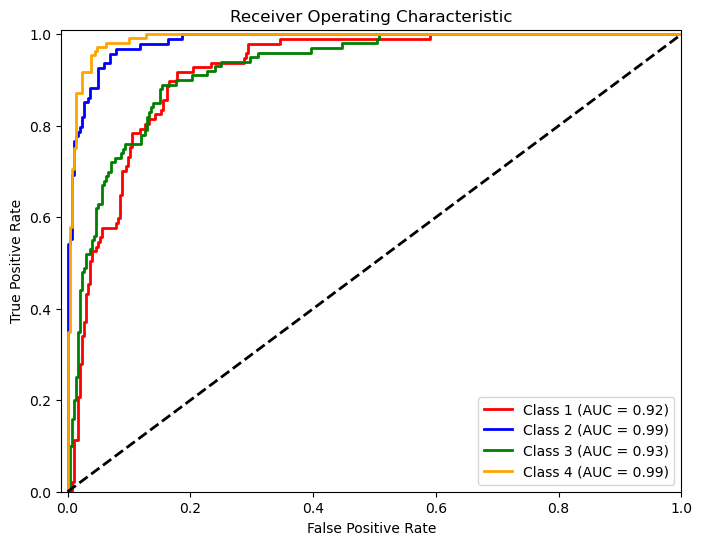

In [52]:
# FPR, TPR and threshold value calculate for every class
fpr = {}
tpr = {}
thresh = {}
for i in range(4):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, nb_model.predict_proba(x_test)[:,i], pos_label=i)

# ROC curves draw
plt.figure(figsize=(8,6))
colors = ['red', 'blue', 'green', 'orange']
for i in range(4):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label='Class {0} (AUC = {1:0.2f})'
             ''.format(i+1, np.trapz(tpr[i],fpr[i])))
    
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# KNN

## Model & Prediction

In [88]:
knn = KNeighborsClassifier()
knn_model = knn.fit(x_train, y_train)
knn_model

KNeighborsClassifier()

In [89]:
y_pred = knn_model.predict(x_test)
accuracy_score(y_test, y_pred)

0.9275

In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90        97
           1       0.95      0.94      0.94        94
           2       0.92      0.90      0.91       100
           3       0.95      0.96      0.95       109

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



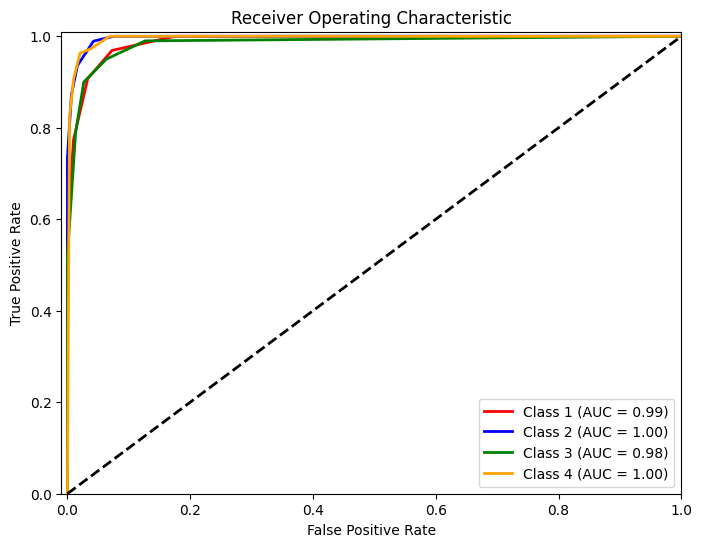

In [14]:
# FPR, TPR and threshold value calculate for every class
fpr = {}
tpr = {}
thresh = {}
for i in range(4):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, knn_model.predict_proba(x_test)[:,i], pos_label=i)

# ROC curves draw
plt.figure(figsize=(8,6))
colors = ['red', 'blue', 'green', 'orange']
for i in range(4):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label='Class {0} (AUC = {1:0.2f})'
             ''.format(i+1, np.trapz(tpr[i],fpr[i])))
    
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Model Tuning

In [15]:
knn_params = {'n_neighbors': np.arange(1,100)}
knn_cv = GridSearchCV(knn, knn_params, cv=10)
knn_cv.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [16]:
knn_cv.best_params_

{'n_neighbors': 15}

In [53]:
knn = KNeighborsClassifier(15)
knn_tuned = knn.fit(x_train, y_train) # optimized model

In [55]:
y_pred = knn_tuned.predict(x_test)
accuracy_score(y_test, y_pred)

0.9225

# SVM

## Model & Prediction

In [56]:
svm_model_linear = SVC(kernel="linear").fit(x_train, y_train)
svm_model_linear

SVC(kernel='linear')

In [57]:
y_pred_linear = svm_model_linear.predict(x_test)
accuracy_score(y_test, y_pred_linear)

0.9825

let's do using rbp kernel

In [58]:
svm_model_rbf = SVC(kernel="rbf").fit(x_train, y_train)
svm_model_rbf

SVC()

In [59]:
y_pred_rbf = svm_model_rbf.predict(x_test)
accuracy_score(y_test, y_pred_rbf)

0.9575

In [60]:
print(classification_report(y_pred_linear, y_test)) # better than rbf kernel

              precision    recall  f1-score   support

           0       1.00      0.94      0.97       103
           1       0.98      1.00      0.99        92
           2       0.96      0.99      0.97        97
           3       0.99      1.00      1.00       108

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400



In [61]:
print(classification_report(y_pred_rbf, y_test))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94        98
           1       0.97      0.96      0.96        95
           2       0.92      0.98      0.95        94
           3       0.99      0.96      0.97       113

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400



# Artificial Neureal Network

## Model & Tahmin

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [27]:
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [28]:
x_train_scaled[0:5]

array([[-0.79776826,  1.02148066, -1.00800608, -0.96801137,  1.05214835,
        -0.98142253, -0.21445191, -1.03316872,  0.31817032,  0.65243169,
         1.02459764, -0.88223152, -0.83174836, -1.27555582, -0.56610356,
        -0.56772709,  1.00375706, -0.98634324],
       [-1.57856933,  1.02148066,  1.08383533, -0.96801137,  1.73335985,
        -0.98142253, -1.59489547, -0.68624953,  1.20440877,  1.08558136,
         0.6932807 ,  1.64274472,  0.67366813, -1.70424199, -1.30219922,
        -0.56772709, -0.996257  ,  1.01384584],
       [ 0.26737077, -0.97897106, -1.00800608, -0.96801137, -0.31027463,
        -0.98142253, -0.32488739,  0.00758886, -0.11065473, -0.21386765,
        -0.63198706, -0.77351111, -0.7536046 , -0.0464107 ,  0.354016  ,
        -0.56772709, -0.996257  ,  1.01384584],
       [ 0.00334266, -0.97897106,  1.20688482,  1.03304572,  0.59800736,
         1.01892912, -1.04271804,  1.04834643, -1.19701154, -0.21386765,
         0.36196376, -1.39255185, -0.55594686,  0.355

In [29]:
x_test_scaled[0:5]

array([[ 0.44564616, -0.97897106,  0.96078583,  1.03304572, -0.53734513,
        -0.98142253, -1.48445998, -1.38008791, -0.31077309,  0.21928202,
         0.19630529, -0.50060067, -1.06158294, -0.00785649,  1.45815949,
        -0.56772709,  1.00375706, -0.98634324],
       [-0.13882632, -0.97897106, -0.76190709,  1.03304572,  0.59800736,
         1.01892912, -0.10401642,  1.74218482,  0.20381698, -0.21386765,
         1.68723152,  0.21828536, -0.00434387, -1.22690408,  0.90608775,
         1.76140969, -0.996257  , -0.98634324],
       [-0.53374015,  1.02148066,  1.32993432, -0.96801137,  1.50628935,
        -0.98142253,  1.33164488,  1.74218482,  0.71840704, -0.21386765,
         0.52762223, -0.67366582,  0.90809941,  0.86512112, -0.01403182,
        -0.56772709, -0.996257  , -0.98634324],
       [-0.59466972, -0.97897106, -1.25410507, -0.96801137,  0.14386636,
         1.01892912, -1.04271804, -0.33933033,  1.51888048,  0.21928202,
        -0.30067012,  1.65605742,  1.26204466, -0.482

In [30]:
mlp_model = MLPClassifier().fit(x_train_scaled, y_train)

In [31]:
y_pred = mlp_model.predict(x_test_scaled)
accuracy_score(y_test, y_pred) # Learning rate is looking very low. Though let's do optimization

0.9075

## Model Tuning

In [32]:
mlp_params = {"alpha": [0.1, 0.01, 0.02, 0.005, 0.0001, 0.00001],
              "hidden_layer_sizes": [(10,10,10),
                                     (100,100,100),
                                     (100,100),
                                     (3,5), 
                                     (5, 3)],
              "solver" : ["lbfgs","adam","sgd"],
              "activation": ["relu","logistic"]}
mlp_model = MLPClassifier()
mlp_cv_model = GridSearchCV(mlp_model, mlp_params,
                            cv=10,
                            n_jobs=-1,
                            verbose=2)
mlp_cv_model.fit(x_train, y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


GridSearchCV(cv=10, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 0.02, 0.005, 0.0001, 1e-05],
                         'hidden_layer_sizes': [(10, 10, 10), (100, 100, 100),
                                                (100, 100), (3, 5), (5, 3)],
                         'solver': ['lbfgs', 'adam', 'sgd']},
             verbose=2)

In [33]:
mlp_cv_model.best_params_

{'activation': 'logistic',
 'alpha': 0.005,
 'hidden_layer_sizes': (100, 100),
 'solver': 'adam'}

In [34]:
mlp_tuned = MLPClassifier(activation= 'logistic',
                          alpha= 0.005,
                          hidden_layer_sizes= (100, 100),
                          solver= 'adam')
mlp_tuned.fit(x_train_scaled, y_train)

MLPClassifier(activation='logistic', alpha=0.005, hidden_layer_sizes=(100, 100))

In [35]:
y_pred = mlp_tuned.predict(x_test_scaled)
accuracy_score(y_test, y_pred)

0.98

In [36]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       100
           1       0.98      0.99      0.98        93
           2       0.97      0.98      0.97        99
           3       0.98      0.99      0.99       108

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400



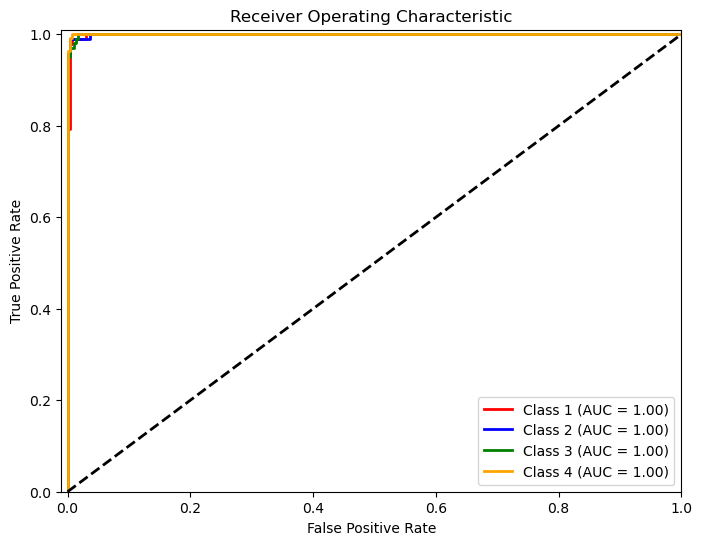

In [37]:
# FPR, TPR and threshold value calculate for every class
fpr = {}
tpr = {}
thresh = {}
for i in range(4):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, mlp_tuned.predict_proba(x_test_scaled)[:,i], pos_label=i)

# ROC curves draw
plt.figure(figsize=(8,6))
colors = ['red', 'blue', 'green', 'orange']
for i in range(4):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label='Class {0} (AUC = {1:0.2f})'
             ''.format(i+1, np.trapz(tpr[i],fpr[i])))
    
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

As we see after to optimize our success rate increased and it wasn't overfit

# CART

## Model & Prediction

In [73]:
cart = DecisionTreeClassifier(max_depth=2)
cart_model = cart.fit(x_train, y_train)

In [74]:
cart_model

DecisionTreeClassifier(max_depth=2)

In [75]:
y_pred = cart_model.predict(x_test)
accuracy_score(y_test, y_pred)

0.75

## Model Tuning

In [35]:
cart_params = {'max_depth': range(1,10),
               'min_samples_split': list(range(2,50))}
cart = DecisionTreeClassifier()
cart_cv = GridSearchCV(cart, cart_params,
                       cv=10,
                       n_jobs=-1,
                       verbose=2)
cart_cv_model = cart_cv.fit(x_train, y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits
[CV] END ...................max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=3; total time=   0.0s
[CV] END ...................max_depth=1, min

In [36]:
cart_cv_model.best_params_

{'max_depth': 8, 'min_samples_split': 21}

In [62]:
cart = DecisionTreeClassifier(max_depth = 8,
                              min_samples_split = 21)
cart_tuned = cart.fit(x_train, y_train)

In [63]:
y_pred = cart_tuned.predict(x_test)
accuracy_score(y_test, y_pred)

0.8575

In [39]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.82      0.77      0.80       104
           1       0.88      0.89      0.89        93
           2       0.80      0.83      0.82        96
           3       0.92      0.93      0.93       107

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.86      0.86      0.86       400



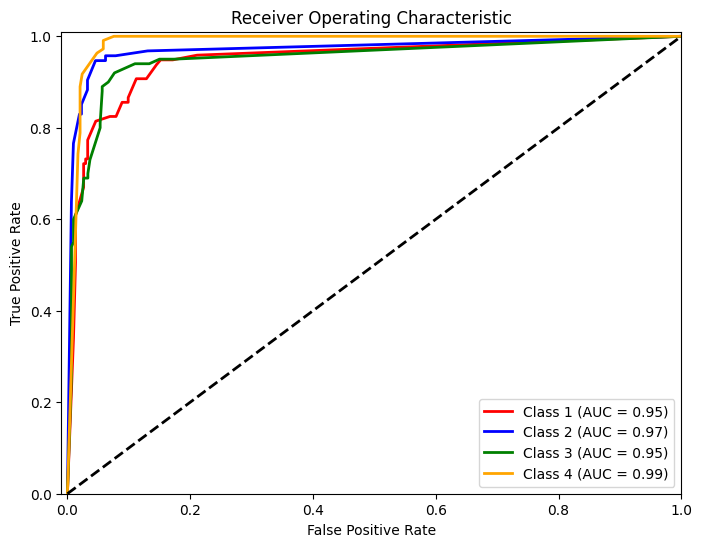

In [40]:
# FPR, TPR and threshold value calculate for every class
fpr = {}
tpr = {}
thresh = {}
for i in range(4):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, cart_tuned.predict_proba(x_test)[:,i], pos_label=i)

# ROC curves draw
plt.figure(figsize=(8,6))
colors = ['red', 'blue', 'green', 'orange']
for i in range(4):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label='Class {0} (AUC = {1:0.2f})'
             ''.format(i+1, np.trapz(tpr[i],fpr[i])))
    
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Random Forests

## Model & Prediction

In [76]:
rf = RandomForestClassifier()
rf_model = rf.fit(x_train, y_train)

In [77]:
y_pred = rf_model.predict(x_test)
accuracy_score(y_test, y_pred)

0.8775

## Model Tuning

In [43]:
rf_params = {"max_depth": [2,3,5,8,10],
             "max_features": [2,5,8],
             "n_estimators": [10,500,1000],
             "min_samples_split": [2,5,10]}
rf = RandomForestClassifier()
rf_cv = GridSearchCV(rf, rf_params,
                     cv=10,
                     n_jobs=-1,
                     verbose=2)
rf_cv_model = rf_cv.fit(x_train, y_train)

Fitting 10 folds for each of 135 candidates, totalling 1350 fits
[CV] END max_depth=2, max_features=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=2, min_samples_split=2, n_estimators=10; tota

In [44]:
rf_cv_model.best_params_

{'max_depth': 10,
 'max_features': 8,
 'min_samples_split': 5,
 'n_estimators': 500}

In [64]:
rf_tuned = RandomForestClassifier(max_depth = 10,
                                  max_features = 8,
                                  min_samples_split = 5,
                                  n_estimators = 500)
rf_tuned.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, max_features=8, min_samples_split=5,
                       n_estimators=500)

In [65]:
y_pred = rf_tuned.predict(x_test)
accuracy_score(y_test, y_pred)

0.9125

Text(0.5, 0, 'Değişken Önem Düzeyleri')

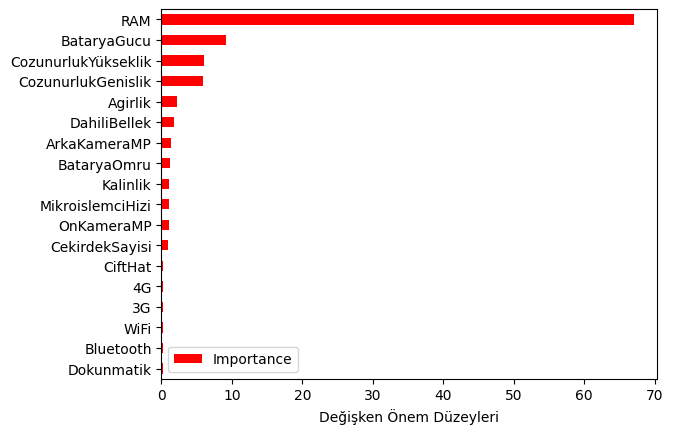

In [48]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                          index = x_train.columns)
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

As we see the most important variable is RAM variable on our dataset. Anyway we saw when we did correlation

# Gradient Boosting Machines(GBM)

## Model & Prediction

In [78]:
gbm = GradientBoostingClassifier()
gbm_model = gbm.fit(x_train, y_train)

In [79]:
y_pred = gbm_model.predict(x_test)
accuracy_score(y_test, y_pred)

0.915

## Model Tuning

In [8]:
gbm_params = {"learning_rate" : [0.001, 0.01, 0.1],
              "n_estimators": [100,500],
              "max_depth": [3,5,10],
              "min_samples_split": [2,5,10]}
gbm_cv = GridSearchCV(gbm, gbm_params,
                      cv=10,
                      n_jobs=-1,
                      verbose=2)
gbm_cv_model = gbm_cv.fit(x_train, y_train)

Fitting 10 folds for each of 54 candidates, totalling 540 fits


In [66]:
gbm = GradientBoostingClassifier(learning_rate = 0.1, 
                                 max_depth = 5,
                                 min_samples_split = 2,
                                 n_estimators = 100)
gbm_tuned = gbm.fit(x_train, y_train)

In [67]:
y_pred = gbm_tuned.predict(x_test)
accuracy_score(y_test, y_pred)

0.915

# XGBoost

## Model & Prediction

In [80]:
xgb_model = XGBClassifier().fit(x_train, y_train)

In [81]:
y_pred = xgb_model.predict(x_test)
accuracy_score(y_test, y_pred)

0.93

## Model Tuning

In [11]:
xgb_params = {
        'n_estimators': [100, 500, 1000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5],
        'learning_rate': [0.1, 0.01, 0.05],
        'min_samples_split': [2, 5, 10]}
xgb = XGBClassifier()
xgb_cv = GridSearchCV(xgb, xgb_params,
                      cv = 10,
                      n_jobs = -1,
                      verbose = 2)
xgb_cv_model = xgb_cv.fit(x_train, y_train)

Fitting 10 folds for each of 243 candidates, totalling 2430 fits
[02:53:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_split" } are not used.



In [12]:
xgb_cv_model.best_params_

{'learning_rate': 0.1,
 'max_depth': 4,
 'min_samples_split': 2,
 'n_estimators': 500,
 'subsample': 0.6}

In [68]:
xgb = XGBClassifier(learning_rate = 0.1, 
                    max_depth = 4,
                    min_samples_split = 2,
                    n_estimators = 500,
                    subsample = 0.6)
xgb_tuned =  xgb.fit(x_train,y_train)

[03:23:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_split" } are not used.



In [69]:
y_pred = xgb_tuned.predict(x_test)
accuracy_score(y_test, y_pred)

0.9275

# CatBoost

## Model & Prediction

In [82]:
cat_model = CatBoostClassifier().fit(x_train, y_train)

Learning rate set to 0.081046
0:	learn: 1.2717028	total: 5.67ms	remaining: 5.66s
1:	learn: 1.1833891	total: 10.8ms	remaining: 5.37s
2:	learn: 1.1151186	total: 16ms	remaining: 5.32s
3:	learn: 1.0376020	total: 23.3ms	remaining: 5.8s
4:	learn: 0.9682810	total: 28.5ms	remaining: 5.68s
5:	learn: 0.9271879	total: 34.4ms	remaining: 5.7s
6:	learn: 0.8798053	total: 38.6ms	remaining: 5.48s
7:	learn: 0.8353139	total: 42.7ms	remaining: 5.3s
8:	learn: 0.7937513	total: 47.2ms	remaining: 5.19s
9:	learn: 0.7511193	total: 51.2ms	remaining: 5.07s
10:	learn: 0.7263842	total: 55.1ms	remaining: 4.95s
11:	learn: 0.6942446	total: 59ms	remaining: 4.86s
12:	learn: 0.6686105	total: 62.6ms	remaining: 4.75s
13:	learn: 0.6370311	total: 66.3ms	remaining: 4.67s
14:	learn: 0.6115176	total: 70.3ms	remaining: 4.62s
15:	learn: 0.5906100	total: 74.1ms	remaining: 4.56s
16:	learn: 0.5677915	total: 77.9ms	remaining: 4.5s
17:	learn: 0.5468161	total: 82ms	remaining: 4.47s
18:	learn: 0.5359260	total: 85.9ms	remaining: 4.43s
19

168:	learn: 0.1223782	total: 808ms	remaining: 3.97s
169:	learn: 0.1218170	total: 814ms	remaining: 3.98s
170:	learn: 0.1213518	total: 818ms	remaining: 3.96s
171:	learn: 0.1202675	total: 821ms	remaining: 3.95s
172:	learn: 0.1198894	total: 825ms	remaining: 3.94s
173:	learn: 0.1189230	total: 830ms	remaining: 3.94s
174:	learn: 0.1186202	total: 834ms	remaining: 3.93s
175:	learn: 0.1178995	total: 838ms	remaining: 3.92s
176:	learn: 0.1176920	total: 841ms	remaining: 3.91s
177:	learn: 0.1170213	total: 847ms	remaining: 3.91s
178:	learn: 0.1165422	total: 850ms	remaining: 3.9s
179:	learn: 0.1159154	total: 853ms	remaining: 3.89s
180:	learn: 0.1152075	total: 857ms	remaining: 3.88s
181:	learn: 0.1148459	total: 864ms	remaining: 3.88s
182:	learn: 0.1137684	total: 868ms	remaining: 3.87s
183:	learn: 0.1134186	total: 871ms	remaining: 3.86s
184:	learn: 0.1127520	total: 878ms	remaining: 3.87s
185:	learn: 0.1121780	total: 882ms	remaining: 3.86s
186:	learn: 0.1115317	total: 885ms	remaining: 3.85s
187:	learn: 0

344:	learn: 0.0635142	total: 1.62s	remaining: 3.07s
345:	learn: 0.0633244	total: 1.62s	remaining: 3.07s
346:	learn: 0.0630372	total: 1.63s	remaining: 3.06s
347:	learn: 0.0629630	total: 1.63s	remaining: 3.06s
348:	learn: 0.0628631	total: 1.64s	remaining: 3.05s
349:	learn: 0.0626656	total: 1.64s	remaining: 3.05s
350:	learn: 0.0624849	total: 1.65s	remaining: 3.05s
351:	learn: 0.0622891	total: 1.65s	remaining: 3.04s
352:	learn: 0.0621762	total: 1.66s	remaining: 3.04s
353:	learn: 0.0620096	total: 1.66s	remaining: 3.03s
354:	learn: 0.0619171	total: 1.67s	remaining: 3.02s
355:	learn: 0.0617328	total: 1.67s	remaining: 3.02s
356:	learn: 0.0616484	total: 1.68s	remaining: 3.02s
357:	learn: 0.0615245	total: 1.68s	remaining: 3.01s
358:	learn: 0.0613479	total: 1.68s	remaining: 3.01s
359:	learn: 0.0611046	total: 1.69s	remaining: 3s
360:	learn: 0.0609209	total: 1.69s	remaining: 3s
361:	learn: 0.0607411	total: 1.7s	remaining: 2.99s
362:	learn: 0.0605887	total: 1.71s	remaining: 2.99s
363:	learn: 0.06034

523:	learn: 0.0403184	total: 2.42s	remaining: 2.2s
524:	learn: 0.0401183	total: 2.43s	remaining: 2.19s
525:	learn: 0.0400436	total: 2.43s	remaining: 2.19s
526:	learn: 0.0399963	total: 2.43s	remaining: 2.18s
527:	learn: 0.0399269	total: 2.44s	remaining: 2.18s
528:	learn: 0.0398269	total: 2.44s	remaining: 2.18s
529:	learn: 0.0397507	total: 2.45s	remaining: 2.17s
530:	learn: 0.0396397	total: 2.45s	remaining: 2.16s
531:	learn: 0.0394991	total: 2.46s	remaining: 2.16s
532:	learn: 0.0393883	total: 2.46s	remaining: 2.15s
533:	learn: 0.0392777	total: 2.46s	remaining: 2.15s
534:	learn: 0.0392284	total: 2.47s	remaining: 2.15s
535:	learn: 0.0391007	total: 2.47s	remaining: 2.14s
536:	learn: 0.0389954	total: 2.48s	remaining: 2.13s
537:	learn: 0.0389230	total: 2.48s	remaining: 2.13s
538:	learn: 0.0388040	total: 2.49s	remaining: 2.13s
539:	learn: 0.0386879	total: 2.49s	remaining: 2.12s
540:	learn: 0.0386306	total: 2.49s	remaining: 2.12s
541:	learn: 0.0385654	total: 2.5s	remaining: 2.11s
542:	learn: 0.

706:	learn: 0.0279687	total: 3.24s	remaining: 1.34s
707:	learn: 0.0279048	total: 3.25s	remaining: 1.34s
708:	learn: 0.0278637	total: 3.25s	remaining: 1.34s
709:	learn: 0.0278240	total: 3.26s	remaining: 1.33s
710:	learn: 0.0277714	total: 3.27s	remaining: 1.33s
711:	learn: 0.0277312	total: 3.27s	remaining: 1.32s
712:	learn: 0.0276587	total: 3.27s	remaining: 1.32s
713:	learn: 0.0276095	total: 3.28s	remaining: 1.31s
714:	learn: 0.0275430	total: 3.28s	remaining: 1.31s
715:	learn: 0.0274816	total: 3.29s	remaining: 1.3s
716:	learn: 0.0274392	total: 3.29s	remaining: 1.3s
717:	learn: 0.0274085	total: 3.29s	remaining: 1.29s
718:	learn: 0.0273734	total: 3.3s	remaining: 1.29s
719:	learn: 0.0272716	total: 3.3s	remaining: 1.28s
720:	learn: 0.0272017	total: 3.31s	remaining: 1.28s
721:	learn: 0.0271738	total: 3.31s	remaining: 1.27s
722:	learn: 0.0271320	total: 3.31s	remaining: 1.27s
723:	learn: 0.0271118	total: 3.32s	remaining: 1.26s
724:	learn: 0.0270686	total: 3.32s	remaining: 1.26s
725:	learn: 0.02

896:	learn: 0.0207694	total: 4.06s	remaining: 466ms
897:	learn: 0.0207377	total: 4.06s	remaining: 461ms
898:	learn: 0.0207056	total: 4.06s	remaining: 457ms
899:	learn: 0.0206805	total: 4.07s	remaining: 452ms
900:	learn: 0.0206519	total: 4.07s	remaining: 448ms
901:	learn: 0.0206118	total: 4.08s	remaining: 443ms
902:	learn: 0.0205899	total: 4.08s	remaining: 439ms
903:	learn: 0.0205454	total: 4.09s	remaining: 434ms
904:	learn: 0.0205109	total: 4.09s	remaining: 429ms
905:	learn: 0.0204868	total: 4.09s	remaining: 425ms
906:	learn: 0.0204630	total: 4.1s	remaining: 420ms
907:	learn: 0.0204344	total: 4.1s	remaining: 416ms
908:	learn: 0.0203998	total: 4.11s	remaining: 411ms
909:	learn: 0.0203779	total: 4.11s	remaining: 407ms
910:	learn: 0.0203580	total: 4.12s	remaining: 402ms
911:	learn: 0.0203341	total: 4.12s	remaining: 398ms
912:	learn: 0.0202945	total: 4.13s	remaining: 394ms
913:	learn: 0.0202341	total: 4.13s	remaining: 389ms
914:	learn: 0.0201936	total: 4.14s	remaining: 385ms
915:	learn: 0.

In [83]:
y_pred = cat_model.predict(x_test)
accuracy_score(y_test, y_pred)

0.9425

## Model Tuning

In [21]:
cat_params = {'iterations': [200,500],
               'learning_rate': [0.01,0.05, 0.1],
               'depth': [3,5,8]}
cat = CatBoostClassifier()
cat_cv = GridSearchCV(cat, cat_params, 
                      cv=5,
                      n_jobs = -1,
                      verbose = 2)
cat_cv_model = cat_cv.fit(x_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
0:	learn: 1.3210651	total: 3.48ms	remaining: 1.74s
1:	learn: 1.2613843	total: 6.96ms	remaining: 1.73s
2:	learn: 1.2088009	total: 9.78ms	remaining: 1.62s
3:	learn: 1.1658894	total: 12.4ms	remaining: 1.53s
4:	learn: 1.1252462	total: 15ms	remaining: 1.48s
5:	learn: 1.0957008	total: 17.4ms	remaining: 1.43s
6:	learn: 1.0655415	total: 19.5ms	remaining: 1.37s
7:	learn: 1.0363936	total: 21.6ms	remaining: 1.33s
8:	learn: 1.0106390	total: 23.6ms	remaining: 1.29s
9:	learn: 0.9784369	total: 25.9ms	remaining: 1.27s
10:	learn: 0.9528020	total: 28.2ms	remaining: 1.25s
11:	learn: 0.9315465	total: 30.3ms	remaining: 1.23s
12:	learn: 0.9084348	total: 32.7ms	remaining: 1.22s
13:	learn: 0.8872876	total: 34.9ms	remaining: 1.21s
14:	learn: 0.8642760	total: 37.1ms	remaining: 1.2s
15:	learn: 0.8456024	total: 38.9ms	remaining: 1.18s
16:	learn: 0.8258013	total: 40.9ms	remaining: 1.16s
17:	learn: 0.8045096	total: 43.4ms	remaining: 1.16s
18:	learn: 0.788

242:	learn: 0.2366962	total: 403ms	remaining: 426ms
243:	learn: 0.2358804	total: 405ms	remaining: 425ms
244:	learn: 0.2353731	total: 406ms	remaining: 423ms
245:	learn: 0.2346824	total: 409ms	remaining: 422ms
246:	learn: 0.2340018	total: 412ms	remaining: 422ms
247:	learn: 0.2334474	total: 415ms	remaining: 421ms
248:	learn: 0.2327982	total: 417ms	remaining: 421ms
249:	learn: 0.2324127	total: 419ms	remaining: 419ms
250:	learn: 0.2321929	total: 421ms	remaining: 418ms
251:	learn: 0.2315817	total: 424ms	remaining: 417ms
252:	learn: 0.2311017	total: 426ms	remaining: 416ms
253:	learn: 0.2308177	total: 429ms	remaining: 415ms
254:	learn: 0.2299518	total: 431ms	remaining: 415ms
255:	learn: 0.2295334	total: 434ms	remaining: 414ms
256:	learn: 0.2288408	total: 436ms	remaining: 413ms
257:	learn: 0.2277278	total: 438ms	remaining: 411ms
258:	learn: 0.2275563	total: 441ms	remaining: 410ms
259:	learn: 0.2269617	total: 443ms	remaining: 409ms
260:	learn: 0.2266912	total: 445ms	remaining: 407ms
261:	learn: 

In [22]:
cat_cv_model.best_params_

{'depth': 3, 'iterations': 500, 'learning_rate': 0.05}

In [70]:
cat = CatBoostClassifier(depth = 3,
                         iterations = 500, 
                         learning_rate = 0.05)
cat_tuned = cat.fit(x_train, y_train)

0:	learn: 1.3210651	total: 2.2ms	remaining: 1.1s
1:	learn: 1.2613843	total: 4ms	remaining: 995ms
2:	learn: 1.2088009	total: 5.41ms	remaining: 897ms
3:	learn: 1.1658894	total: 6.9ms	remaining: 856ms
4:	learn: 1.1252462	total: 8.57ms	remaining: 848ms
5:	learn: 1.0957008	total: 10.2ms	remaining: 843ms
6:	learn: 1.0655415	total: 12.2ms	remaining: 858ms
7:	learn: 1.0363936	total: 13.5ms	remaining: 828ms
8:	learn: 1.0106390	total: 17.2ms	remaining: 937ms
9:	learn: 0.9784369	total: 18.4ms	remaining: 904ms
10:	learn: 0.9528020	total: 19.6ms	remaining: 872ms
11:	learn: 0.9315465	total: 20.7ms	remaining: 840ms
12:	learn: 0.9084348	total: 21.8ms	remaining: 818ms
13:	learn: 0.8872876	total: 23.8ms	remaining: 826ms
14:	learn: 0.8642760	total: 25.2ms	remaining: 815ms
15:	learn: 0.8456024	total: 26.6ms	remaining: 803ms
16:	learn: 0.8258013	total: 27.9ms	remaining: 792ms
17:	learn: 0.8045096	total: 30.1ms	remaining: 807ms
18:	learn: 0.7885936	total: 31.5ms	remaining: 798ms
19:	learn: 0.7744609	total: 

160:	learn: 0.2959727	total: 198ms	remaining: 417ms
161:	learn: 0.2946289	total: 199ms	remaining: 416ms
162:	learn: 0.2935701	total: 201ms	remaining: 415ms
163:	learn: 0.2924825	total: 202ms	remaining: 413ms
164:	learn: 0.2918879	total: 203ms	remaining: 412ms
165:	learn: 0.2906477	total: 204ms	remaining: 410ms
166:	learn: 0.2896425	total: 205ms	remaining: 409ms
167:	learn: 0.2889283	total: 206ms	remaining: 408ms
168:	learn: 0.2881842	total: 208ms	remaining: 407ms
169:	learn: 0.2872788	total: 209ms	remaining: 406ms
170:	learn: 0.2869147	total: 210ms	remaining: 404ms
171:	learn: 0.2857760	total: 211ms	remaining: 403ms
172:	learn: 0.2842250	total: 213ms	remaining: 402ms
173:	learn: 0.2828891	total: 214ms	remaining: 401ms
174:	learn: 0.2814904	total: 215ms	remaining: 400ms
175:	learn: 0.2809901	total: 217ms	remaining: 399ms
176:	learn: 0.2807382	total: 218ms	remaining: 398ms
177:	learn: 0.2804443	total: 219ms	remaining: 397ms
178:	learn: 0.2795263	total: 221ms	remaining: 396ms
179:	learn: 

467:	learn: 0.1634750	total: 587ms	remaining: 40.1ms
468:	learn: 0.1632163	total: 588ms	remaining: 38.9ms
469:	learn: 0.1630559	total: 589ms	remaining: 37.6ms
470:	learn: 0.1629327	total: 591ms	remaining: 36.4ms
471:	learn: 0.1628623	total: 592ms	remaining: 35.1ms
472:	learn: 0.1628331	total: 593ms	remaining: 33.8ms
473:	learn: 0.1626020	total: 594ms	remaining: 32.6ms
474:	learn: 0.1625264	total: 595ms	remaining: 31.3ms
475:	learn: 0.1623817	total: 596ms	remaining: 30ms
476:	learn: 0.1623027	total: 597ms	remaining: 28.8ms
477:	learn: 0.1621926	total: 598ms	remaining: 27.5ms
478:	learn: 0.1618631	total: 600ms	remaining: 26.3ms
479:	learn: 0.1616972	total: 602ms	remaining: 25.1ms
480:	learn: 0.1616376	total: 603ms	remaining: 23.8ms
481:	learn: 0.1615947	total: 604ms	remaining: 22.5ms
482:	learn: 0.1612696	total: 605ms	remaining: 21.3ms
483:	learn: 0.1609891	total: 606ms	remaining: 20ms
484:	learn: 0.1608418	total: 608ms	remaining: 18.8ms
485:	learn: 0.1605867	total: 609ms	remaining: 17.5

In [71]:
y_pred = cat_tuned.predict(x_test)
accuracy_score(y_test, y_pred)

0.935

# Compare of All Models

In [92]:
models = [
    loj_tuned,
    nb_model,
    knn_model,
    svm_model_linear,
    mlp_tuned,
    cart_tuned,
    rf_tuned,
    gbm_tuned,
    xgb_tuned,
    cat_tuned
]

for model in models:
    names = model.__class__.__name__
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(names + ":" )
    print("Accuracy: {:.4%}".format(accuracy))

----------------------------
LogisticRegression:
Accuracy: 97.5000%
----------------------------
GaussianNB:
Accuracy: 81.0000%
----------------------------
KNeighborsClassifier:
Accuracy: 92.7500%
----------------------------
SVC:
Accuracy: 98.2500%
----------------------------
MLPClassifier:
Accuracy: 23.5000%
----------------------------
DecisionTreeClassifier:
Accuracy: 85.7500%
----------------------------
RandomForestClassifier:
Accuracy: 91.2500%
----------------------------
GradientBoostingClassifier:
Accuracy: 91.5000%
----------------------------
XGBClassifier:
Accuracy: 92.7500%
----------------------------
CatBoostClassifier:
Accuracy: 93.5000%


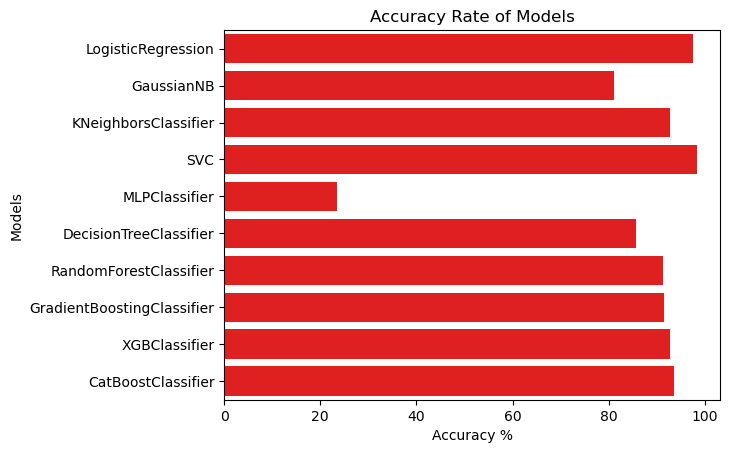

In [93]:
result = []
results = pd.DataFrame(columns= ["Models","Accuracy"])

for model in models:
    names = model.__class__.__name__
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)    
    result = pd.DataFrame([[names, accuracy*100]], columns= ["Models","Accuracy"])
    results = results.append(result)
    
sns.barplot(x= 'Accuracy', y = 'Models', data=results, color="r")
plt.xlabel('Accuracy %')
plt.title('Accuracy Rate of Models');  

As we see it seems the most successfull algorithm is SVC.